In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns

In [2]:
df = pd.read_csv("crime_data.csv")

In [3]:
sd = df.copy()

In [4]:
sd.columns = ['City','Murder' , 'Assault', 'Urbanpop','Rape']

In [5]:
sd.loc[:,'Total'] = sd.sum(numeric_only=True, axis=1)

In [6]:
sd.head()

,City,Murder,Assault,Urbanpop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6


In [7]:
sd.describe()

,Murder,Assault,Urbanpop,Rape,Total
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,265.320000
std,4.35551,83.337661,14.474763,9.366385,98.350844
min,0.80000,45.000000,32.000000,7.300000,93.400000
25%,4.07500,109.000000,54.500000,15.075000,187.950000
50%,7.25000,159.000000,66.000000,20.100000,257.450000
75%,11.25000,249.000000,77.750000,26.175000,348.500000
max,17.40000,337.000000,91.000000,46.000000,462.300000


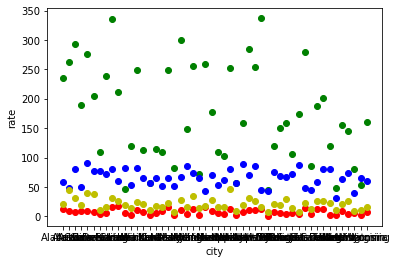

In [8]:
plt.scatter(sd.City, sd.Murder, color='r')
plt.scatter(sd.City, sd.Assault, color='g')
plt.scatter(sd.City, sd.Urbanpop, color='b')
plt.scatter(sd.City, sd.Rape, color='y')
plt.xlabel('city')
plt.ylabel('rate')
plt.show()

In [9]:
X = sd[['Murder', 'Assault', 'Rape', 'Urbanpop']]

In [10]:
sd_norm = preprocessing.scale(X)

In [11]:
#standardize the data to normal distribution
sd_norm = pd.DataFrame(sd_norm) 

In [12]:
sd_norm.head()

,0,1,2,3
0,1.255179,0.790787,-0.003451,-0.526195
1,0.513019,1.118060,2.509424,-1.224067
2,0.072361,1.493817,1.053466,1.009122
3,0.234708,0.233212,-0.186794,-1.084492
4,0.281093,1.275635,2.088814,1.776781


C:\Users\Vishnu\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


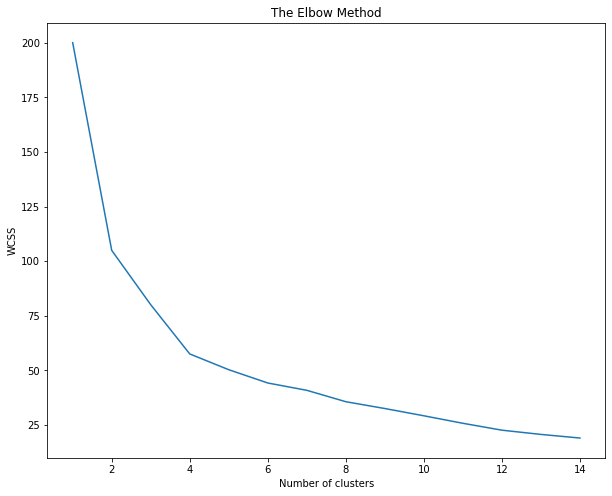

In [13]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(sd_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
T_kmeans = kmeans.fit_predict(sd_norm) 

In [16]:
T_kmeans

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [17]:
T_kmeans1=T_kmeans+1
cluster = list(T_kmeans1)

In [18]:
sd['cluster'] = cluster

In [19]:
kmeans_mean_cluster = pd.DataFrame(round(sd.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,Urbanpop,Rape,Total
cluster,,,,,
1,5.7,138.9,73.9,18.8,237.2
2,13.9,243.6,53.8,21.4,332.7
3,10.8,257.4,76.0,33.2,377.4
4,3.6,78.5,52.1,12.2,146.4


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

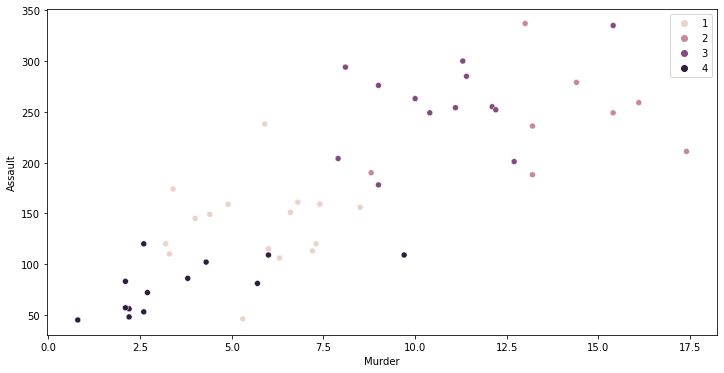

In [24]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=sd['Murder'], y = sd['Assault'],hue=T_kmeans1)

<AxesSubplot:xlabel='Murder', ylabel='Rape'>

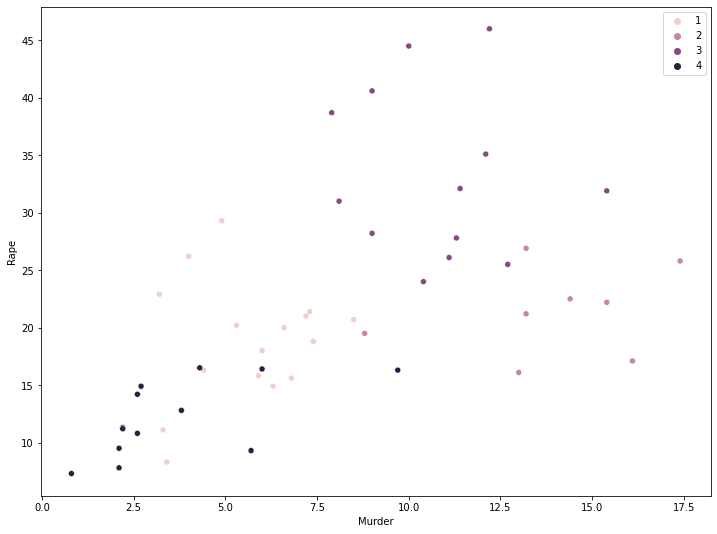

In [25]:
plt.figure(figsize=(12,9))
sns.scatterplot(x=sd['Murder'], y = sd['Rape'],hue=T_kmeans1)

<AxesSubplot:xlabel='Rape', ylabel='Assault'>

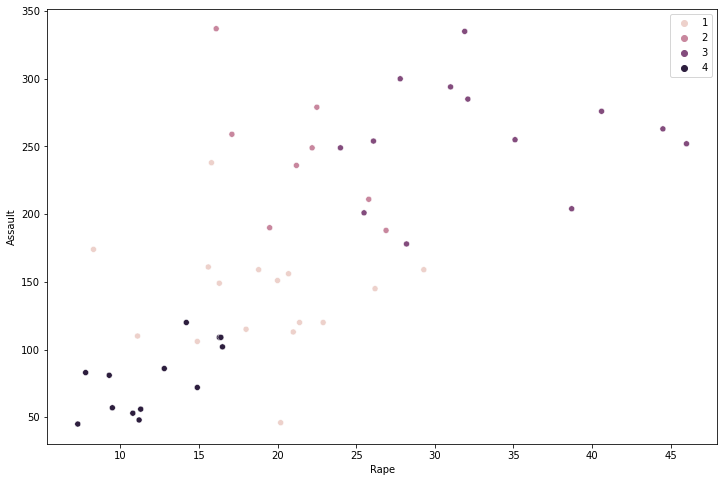

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=sd['Rape'], y = sd['Assault'],hue=T_kmeans1)

In [27]:
stats = sd.sort_values("Total", ascending=True)
sd_total= pd.DataFrame(stats) 

In [28]:
sd_total.head()

,City,Murder,Assault,Urbanpop,Rape,Total,cluster
44,Vermont,2.2,48,32,11.2,93.4,4
33,North Dakota,0.8,45,44,7.3,97.1,4
28,New Hampshire,2.1,57,56,9.5,124.6,4
14,Iowa,2.2,56,57,11.3,126.5,4
48,Wisconsin,2.6,53,66,10.8,132.4,4


In [29]:
print(" Higher the murdur rates then higher will be the assaults in the city")
print(" rates of assaults and rapes are having correlation")

 Higher the murdur rates then higher will be the assaults in the city
 rates of assaults and rapes are having correlation
